<a id='sec_Notebooks_Elementos'></a> 
# Elementos básicos de los algoritmos cuánticos

## Índice

- **[1 - SWAP a partir de CNOTs](#sec_Notebooks_Elementos_1)**
- **[2 - Medidas de calidad de un circuito](#sec_Notebooks_Elementos_2)**

In [1]:
from qiskit import Aer, QuantumCircuit, execute, transpile
from qiskit.quantum_info import Statevector
from qiskit.tools.visualization import array_to_latex

<a id='sec_Notebooks_Elementos_1'></a>
## SWAP a partir de CNOTs 

<figure><center>
<img src="Figuras/Fig_elementos_Equiv_CNOTs" align=center alt="" width='500px'/>
</center></figure>

Para verificar esta identidad podemos construir los dos circuitos y verificar las matrices unitarias que implementan son iguales.

In [2]:
U_simulator = Aer.get_backend('unitary_simulator')

qc_left= QuantumCircuit(2)
qc_right= QuantumCircuit(2)

qc_left.cx(0,1)
qc_left.cx(1,0)
qc_left.cx(0,1)
qc_right.swap(1,0)
 
print(qc_left)
print(qc_right)

U_left = execute(qc_left, backend = U_simulator).result().get_unitary()
U_right = execute(qc_right, backend = U_simulator).result().get_unitary()

          ┌───┐     
q_0: ──■──┤ X ├──■──
     ┌─┴─┐└─┬─┘┌─┴─┐
q_1: ┤ X ├──■──┤ X ├
     └───┘     └───┘
        
q_0: ─X─
      │ 
q_1: ─X─
        


In [3]:
array_to_latex(U_left, prefix="\\text{U_left = }\n")

<IPython.core.display.Latex object>

In [4]:
array_to_latex(U_right, prefix="\\text{U_right = }\n")

<IPython.core.display.Latex object>

<a id='sec_Notebooks_Elementos_2'></a>
## Medidas de calidad de un circuito 

Alguna medidas cuantitativas  permiten comparar la calidad de distintos circuitos que efectúan la misma tarea. 

- **Anchura:** es el número total de cúbits  que necesita.  El uso de ancillas incrementa la anchura de un circuito, y por tanto, reduce su calidad en comparación con otro circuito que tenga menor anchura. 

- **Coste:** el número de puertas presentes en el mismo. 

- **Complejidad:** es una medida estandarizada asociada al número de *puertas elementales* en las que puede descomponerse un circuito.  Es un número a reducir. Sin embargo no es una medida inambigua ya que depende de la librería utilizada. Por ejemplo, si ésta es la NCT, entonces el coste del [circuito](#Toffolidecomposition) es 1. Sin embargo, si la librería es la tomada por $ \{ H, S, T, \hbox{CNOT}\} $
entonces el coste sube hasta 7. Por ello, a la hora de comparar circuitos es importante definirlos en la misma base. 

- **Profundidad:** para evaluar la *profundidad*  es necesario agrupar todas las puertas  que se puedan realizar en paralelo en cortes temporales de duración $\Delta$ (pulso). En particular puertas que actúen sobre registros diferentes no interferirán y se podrán paralelizar.  Por ejemplo, el [circuito que descompone $U$](#CUdecomposition)   tiene un coste igual a 6, pero una profundidad igual a 5. 

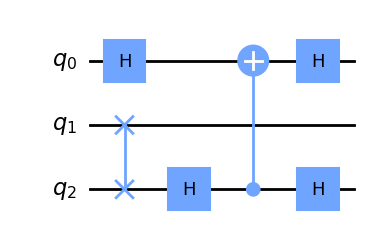

In [7]:
qc = QuantumCircuit(3)
qc.h(0)
qc.swap(2,1)
qc.h(2)
qc.cx(2,0)
qc.h([0,2])
qc.draw('mpl')

In [8]:
print('tamaño=',qc.size())
print('puertas no locales=', qc.num_nonlocal_gates())
print('anchura=', qc.num_qubits)
print('profundidad=', qc.depth())

tamaño= 6
puertas no locales= 2
anchura= 3
profundidad= 4


Decomponemos el circuito en las puertas básicas del simulados.

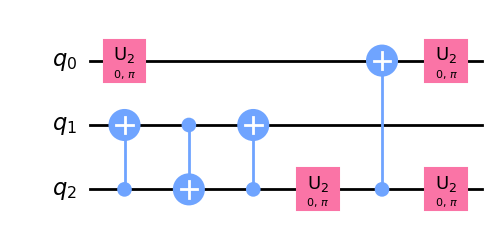

In [9]:
qc_dec=qc.decompose()
qc_dec.draw('mpl')

In [8]:
print('complejidad=', qc_dec.size())
print('puertas no locales=', qc_dec.num_nonlocal_gates())
print('anchura=', qc_dec.num_qubits)
print('profundidad=', qc_dec.depth())

complejidad= 8
puertas no locales= 4
anchura= 3
profundidad= 6


Descompongamos el circito en las puertas básicas de un ordenador real de IBM

In [10]:
from qiskit_ibm_provider import IBMProvider, least_busy

# Load a previously saved account.
provider = IBMProvider()

# Select a different hub/group/project.
provider = IBMProvider(instance="ibm-q/open/main")

In [11]:
backend = least_busy(provider.backends(filters=lambda b: b.configuration().n_qubits >= 3 and
                                   not b.configuration().simulator and b.status().operational==True))
backend.configuration().basis_gates

['ecr', 'id', 'rz', 'sx', 'x']

In [13]:
print(backend)

<IBMBackend('ibm_sherbrooke')>


/home/dcb/Programs/miniconda/miniconda3/envs/qiskit_qibo_penny_2/lib/python3.11/site-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


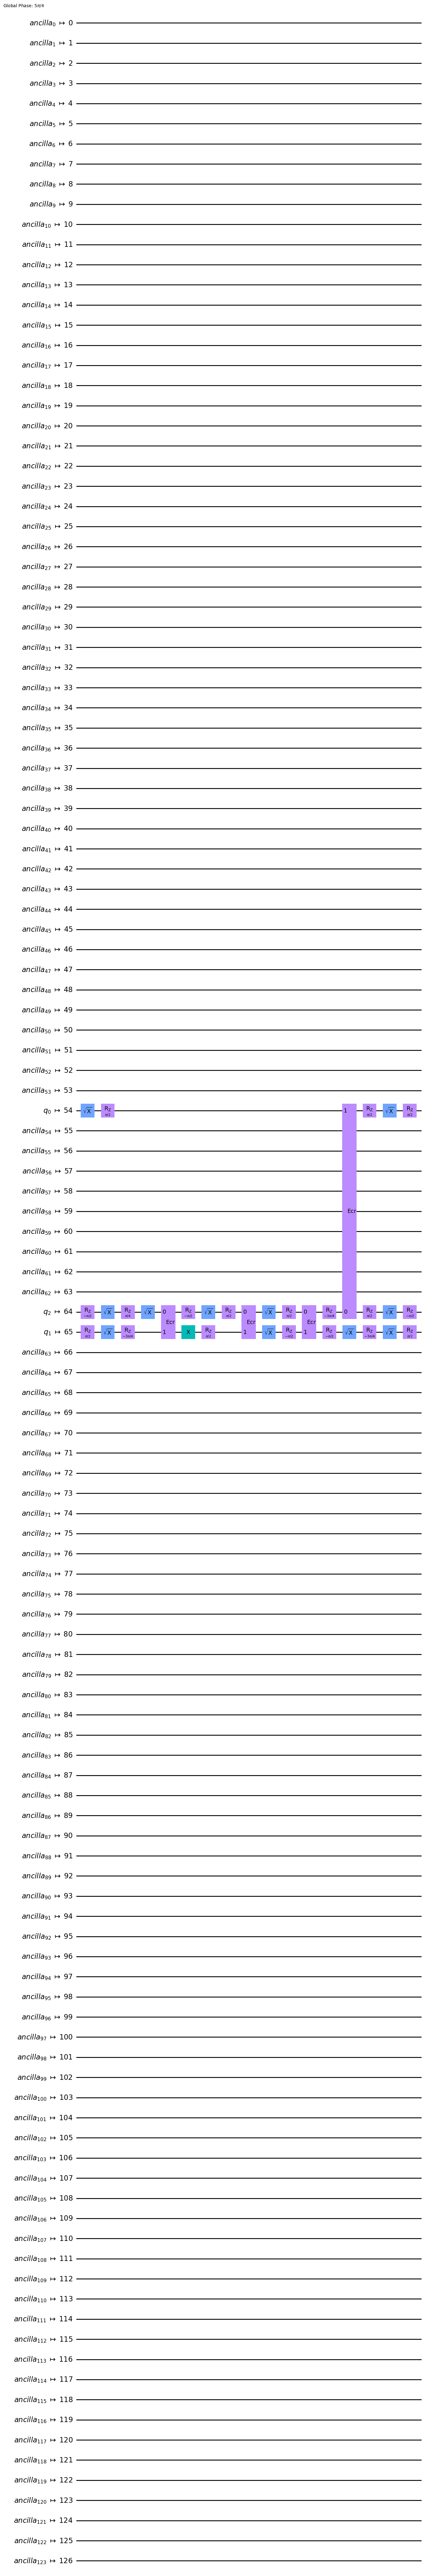

In [12]:
t_qc = transpile(qc, backend, optimization_level=3)
t_qc.draw('mpl')

In [12]:
print('complejidad=', t_qc.size())
print('puertas no locales=', t_qc.num_nonlocal_gates())
print('anchura=', t_qc.num_qubits)
print('profundidad=', t_qc.depth())

complejidad= 15
puertas no locales= 4
anchura= 7
profundidad= 10


In [ ]:
import qiskit.tools.jupyter
%qiskit_version_table